### **Research Project -  Khaled Alfawal**
#### Regression On Abalone Dataset

In [1]:
# Downloading the dataset
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [2]:
# Installing pycaret
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.4 MB/s 
     |████████████████████████████████| 167 kB 23.4 MB/s 
     |████████████████████████████████| 25.9 MB 76.8 MB/s 
     |████████████████████████████████| 3.3 MB 44.3 MB/s 
     |████████████████████████████████| 56 kB 2.8 MB/s 
     |████████████████████████████████| 17.0 MB 92 kB/s 
     |████████████████████████████████| 1.7 MB 39.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 46.9 MB/s 
     |████████████████████████████████| 636 kB 48.7 MB/s 
     |████████████████████████████████| 6.8 MB 41.3 MB/s 
     |████████████████████████████████| 4.8 MB 52.4 MB/s 
     |████████████████████████████████| 141 kB 59.1 MB/s 
     |████████████████████████████████|

In [1]:
# Importing the dataset
import pandas as pd
df = pd.read_csv('abalone.data')
'''
	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in year
'''
# Add column names
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
dataset  = df

In [2]:
#check the shape of data
dataset.shape

(4176, 9)

In [3]:
# Splitting some data for testing later
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3758, 9)
Unseen Data For Predictions: (418, 9)


In [4]:
# Setting up the environment for pycaret
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Rings', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Rings
2,Original Data,"(3758, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2630, 10)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [5]:
# Finding the best model
best = compare_models()
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5460,4.8550,2.2020,0.5229,0.1764,0.1533,0.304
lr,Linear Regression,1.6036,4.9748,2.2276,0.5134,0.1823,0.1606,0.334
br,Bayesian Ridge,1.6039,4.9771,2.2282,0.5132,0.1825,0.1606,0.013
lar,Least Angle Regression,1.6043,4.9787,2.2285,0.5130,0.1825,0.1607,0.015
rf,Random Forest Regressor,1.5762,4.9904,2.2322,0.5084,0.1798,0.1569,1.119
ridge,Ridge Regression,1.6093,5.0360,2.2414,0.5075,0.1857,0.1616,0.013
et,Extra Trees Regressor,1.5888,5.0187,2.2381,0.5068,0.1800,0.1578,0.728
huber,Huber Regressor,1.5630,5.1278,2.2609,0.5000,0.1831,0.1505,0.062
lightgbm,Light Gradient Boosting Machine,1.6008,5.1469,2.2670,0.4943,0.1817,0.1576,0.146
knn,K Neighbors Regressor,1.6073,5.2706,2.2933,0.4836,0.1846,0.1576,0.064


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
# Gradient Boosting Regressor is the best model
gbr = create_model('gbr')
print(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4493,4.3702,2.0905,0.5128,0.1697,0.1479
1,1.5862,4.9850,2.2327,0.5656,0.1749,0.1602
2,1.4566,4.3005,2.0738,0.5677,0.1699,0.1463
3,1.6295,5.3252,2.3076,0.5635,0.1797,0.1577
4,1.5143,4.4407,2.1073,0.4231,0.1719,0.1520
5,1.6046,5.1850,2.2771,0.4810,0.1794,0.1556
6,1.5891,4.8583,2.2042,0.5298,0.1762,0.1549
7,1.5460,5.1363,2.2663,0.5465,0.1750,0.1438
8,1.5402,4.9886,2.2335,0.4596,0.1856,0.1604


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [7]:
# Tuning the model to get the best parameters
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5092,4.6288,2.1515,0.4840,0.1781,0.1583
1,1.6459,5.4681,2.3384,0.5235,0.1907,0.1735
2,1.5066,4.5950,2.1436,0.5381,0.1797,0.1588
3,1.7845,6.3884,2.5275,0.4764,0.1997,0.1775
4,1.4673,4.3712,2.0907,0.4322,0.1736,0.1513
5,1.6363,5.4233,2.3288,0.4572,0.1867,0.1653
6,1.6617,5.2034,2.2811,0.4964,0.1862,0.1672
7,1.6402,5.6251,2.3717,0.5033,0.1890,0.1597
8,1.5485,4.9141,2.2168,0.4677,0.1861,0.1641


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


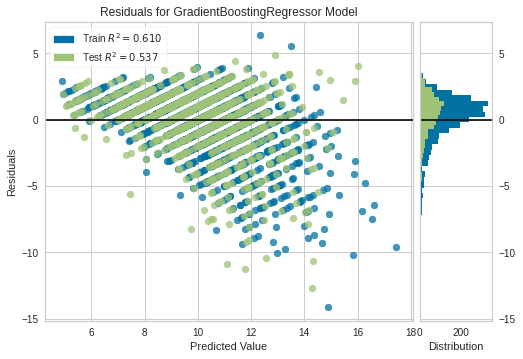

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [8]:
# Plotting the model
plot_model(tuned_gbr)

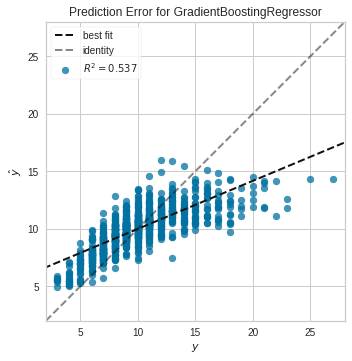

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [9]:
# Plotting the error
plot_model(tuned_gbr, plot = 'error')

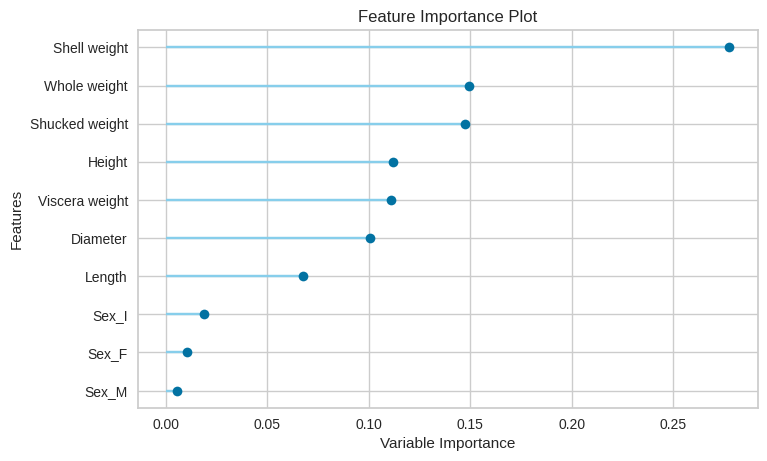

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [10]:
# Getting the best features 
plot_model(tuned_gbr, plot='feature')

In [11]:
# Evaluating the model
evaluate_model(tuned_gbr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
# Predicting the unseen data
predict_model(tuned_gbr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.5764,4.8359,2.1991,0.5372,0.1833,0.1654


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings,Label
0,0.600,0.460,0.150,1.2350,0.6025,0.2740,0.2900,1.0,0.0,0.0,8,10.045374
1,0.375,0.245,0.100,0.3940,0.1660,0.0910,0.1125,0.0,1.0,0.0,6,8.065423
2,0.550,0.450,0.145,0.7410,0.2950,0.1435,0.2665,1.0,0.0,0.0,10,11.323517
3,0.540,0.425,0.135,0.6860,0.3475,0.1545,0.2130,0.0,1.0,0.0,8,9.403993
4,0.425,0.340,0.100,0.3515,0.1625,0.0820,0.0940,0.0,1.0,0.0,7,7.800797
...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.645,0.505,0.150,1.1605,0.5190,0.2615,0.3350,0.0,0.0,1.0,10,10.325758
1124,0.580,0.455,0.170,0.9075,0.3740,0.2135,0.2850,1.0,0.0,0.0,13,10.913640
1125,0.600,0.470,0.130,1.0105,0.4230,0.2190,0.2980,0.0,0.0,1.0,9,11.046844
1126,0.575,0.475,0.170,0.9670,0.3775,0.2840,0.2750,0.0,1.0,0.0,13,11.176400


In [13]:
# Saving the model
final_gbr = finalize_model(tuned_gbr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, le

In [15]:
# Checking with unseen data
unseen_predictions = predict_model(final_gbr, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.6203,5.0688,2.2514,0.5184,0.1878,0.1643


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label
0,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,13.120726
1,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,11,10.679578
2,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,10,10.146392
3,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9,8.975624
4,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,10,10.373542
